# The K-nearest neighbors (KNN) 
KNN algorithm is a type of supervised machine learning algorithms.
KNN is a non-parametric learning, which means that it doesn't assume anything about the underlying data.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  
from sklearn.preprocessing import StandardScaler                                          ## scale features
from sklearn.neighbors import KNeighborsClassifier                                        ## fit model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score        ## evaluate the model
from sklearn.pipeline import Pipeline

## Import data

In [2]:
from deezerData import readData
df, X, y, X_train, X_test, y_train, y_test = readData()

# Making arrays from the imported data
X, y, X_train, X_test, y_train, y_test = X.values, y.values, X_train.values, X_test.values, y_train.values, y_test.values

## Way 1: Scaling in a pipeline, grid search with cross validation

Source: DataCamp

In this section, we build the pipeline, which includes the scaler and the KNeighborsClassifier. Next, the GridSearchCV is used to find the best parameters for the number of neighbors from 1 to 50. 

In [3]:
# Build pipeline
steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)
# n_neighbors from 1 to 50
parameters = {'knn__n_neighbors': np.arange(1, 50)}

# Grid search by fitting the model
cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)
print(cv.best_params_)
print(cv.score(X_test, y_test))

{'knn__n_neighbors': 5}
0.7632495164410058


After having the best parameters, we evaluate the accuracy and ROC AUC as follows:

In [10]:
# Evaluation
print(classification_report(y_test, y_pred))
print("Accuracy of way 1: {}".format(cv.score(X_test, y_test)))
print("ROC AUC of way 1: {}".format(roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.64      0.63      0.64       847
           1       0.82      0.83      0.82      1738

    accuracy                           0.76      2585
   macro avg       0.73      0.73      0.73      2585
weighted avg       0.76      0.76      0.76      2585

Accuracy of way 1: 0.7632495164410058
ROC AUC of way 1: 0.7289091805777651


## Way 2: Finding the best value of K

Source: https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

Text(0, 0.5, 'Mean Error')

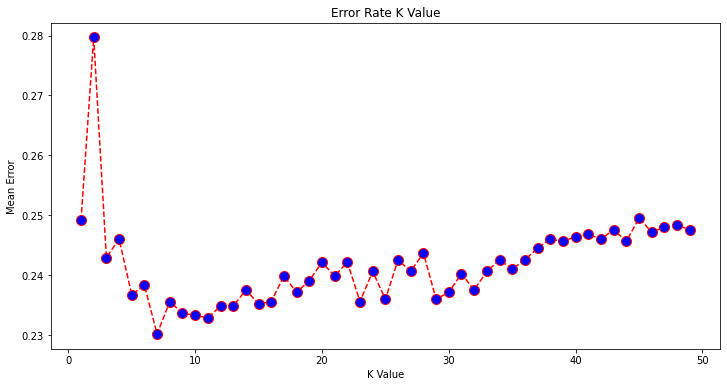

In [5]:
# Feature Scaling: all of features can be uniformly evaluated
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

error = []

# Calculating error for K values between 1 and 50 (executes in a loop)
## In each iteration the mean error for predicted values of test set is calculated 
for i in range(1, 50):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_train_scaled, y_train)
    pred_i = knn2.predict(X_test_scaled)
    error.append(np.mean(pred_i != y_test))

## Plot the mean error for the predicted values of test set for all the K values
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
          markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

From the output we can see that the mean error is lowest when the value of the K is 17.

In [6]:
# Fit model, n_neighbor is choosen because of low mean error as above
classifier = KNeighborsClassifier(n_neighbors=17)
classifier.fit(X_train, y_train)

# Predict
y_pred_2 = classifier.predict(X_test_scaled)

# Evaluation
print(confusion_matrix(y_test, y_pred_2))
print(classification_report(y_test, y_pred_2))
print("AUC of KNN way 2: {}".format(roc_auc_score(y_test, y_pred_2)))             

[[ 847    0]
 [1738    0]]
              precision    recall  f1-score   support

           0       0.33      1.00      0.49       847
           1       0.00      0.00      0.00      1738

    accuracy                           0.33      2585
   macro avg       0.16      0.50      0.25      2585
weighted avg       0.11      0.33      0.16      2585

AUC of KNN way 2: 0.5


Compared to way 1, way 2 generates a much lower score of ROC AUC. 

## Model complexity and over/underfitting

In [7]:
## Setup arrays to store train and test accuracies
neighbors = np.arange(1, 50)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn3 = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn3.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn3.score(X_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn3.score(X_test, y_test)

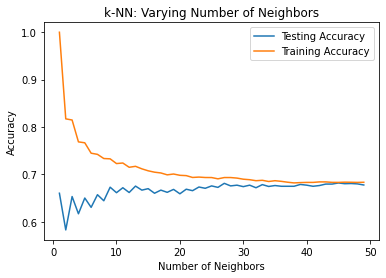

In [8]:
# Generate plot
fig2, ax2 = plt.subplots(1)
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()